# 📘 Predicting Premier League Positions from Goal Difference

# Author:Emmanuel Gyamfi

**Objective**: Use linear regression to predict final league position based on goal difference.

**Tools**: Python, pandas, matplotlib, scikit-learn

**Outcome**: R² = 0.XX on test data. Strong negative correlation observed between goal difference and league position.

In [275]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [276]:
#Load the Premier League dataset
df = pd.read_csv("pl-tables-1993-2024.csv")

In [277]:
#Display the first five rows and basic information about the dataset
print(df.head()) 

#Display the column names to understand the data structure
print(df.columns) 

#Display detailed information including data types and missing values
print(df.info()) 


   season_end_year            team  position  played  won  drawn  lost  gf  \
0             1993  Manchester Utd         1      42   24     12     6  67   
1             1993     Aston Villa         2      42   21     11    10  57   
2             1993    Norwich City         3      42   21      9    12  61   
3             1993       Blackburn         4      42   20     11    11  68   
4             1993             QPR         5      42   17     12    13  63   

   ga  gd  points                                 notes  
0  31  36      84  → Champions League via league finish  
1  40  17      74          → UEFA Cup via league finish  
2  65  -4      72        → UEFA Cup via league finish 1  
3  46  22      71                                   NaN  
4  55   8      63                                   NaN  
Index(['season_end_year', 'team', 'position', 'played', 'won', 'drawn', 'lost',
       'gf', 'ga', 'gd', 'points', 'notes'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'

In [278]:
#Select the independent variable (Goal Difference) and dependent variable (League Position)
#Goal difference (gd) will be used to predict position
x = df.gd.values.reshape(-1,1) #Features must be reshaped into a 2D array
y = df.position #Target

#Print their shapes to confirm dimensions
print(x.shape,y.shape)

(646, 1) (646,)


In [279]:
#Create and fit a Linear Regression model using the entire dataset
model = LinearRegression().fit(x,y)

#Extract model parameters: intercept and slope
intercept = model.intercept_
slope = model.coef_

#Predict league position using the fitted model
y_pred = intercept + slope * x

In [280]:
#Calculate and print the R-squared score (Goodness of Fit) for the model
r_sq = model.score(x,y)
print(r_sq)

0.821337797068943


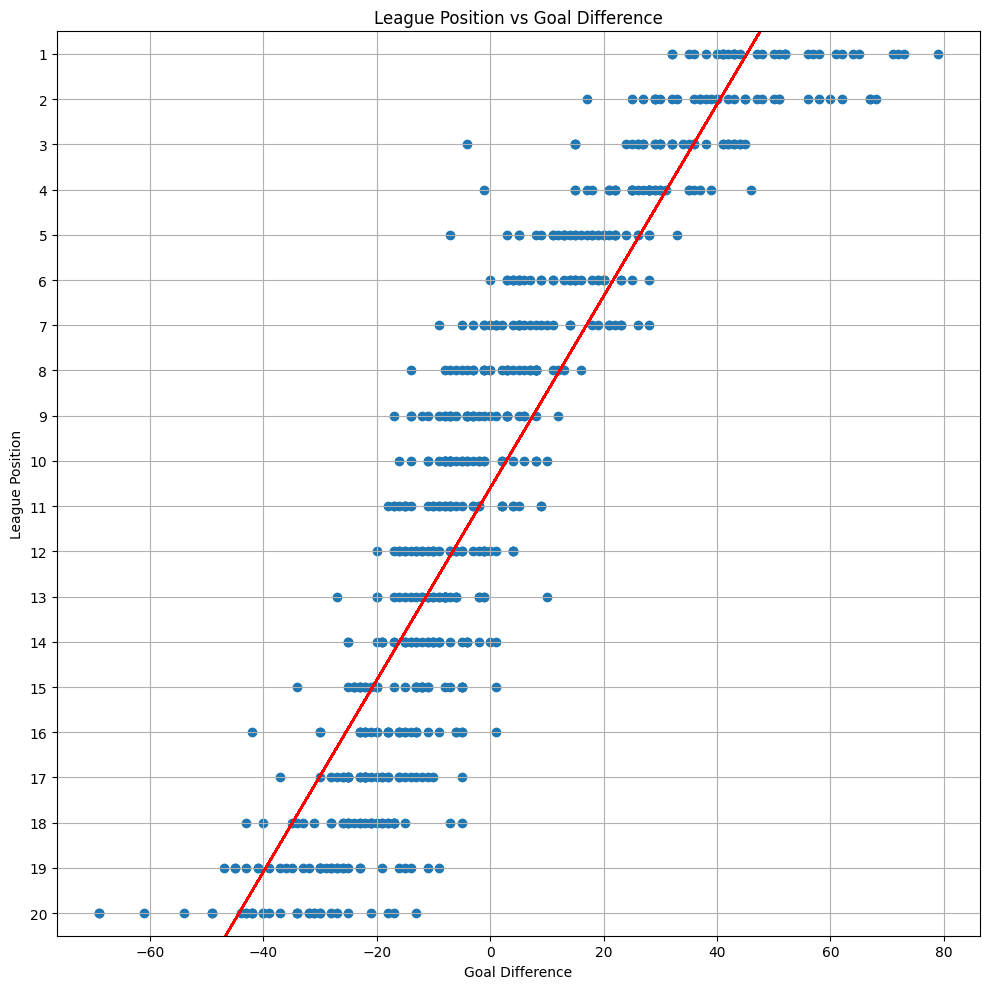

In [281]:
#Plot the data
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(x,y)
plt.title('League Position vs Goal Difference')
plt.xlabel('Goal Difference')
plt.ylabel('League Position')

plt.plot(x,y_pred,c='r')

plt.yticks(range(1,21))
plt.ylim(.5,20.5)
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

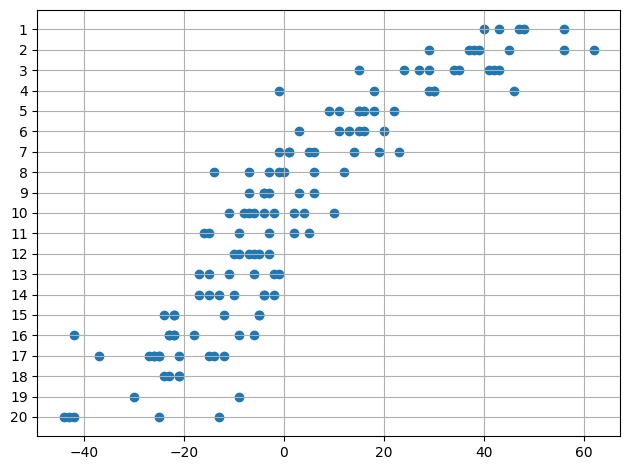

In [282]:
#Split data into training (80%) and testing sets (20%) for beeter model evaluation
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Scatter plot to visualise the distribution of test daat
plt.scatter(x_test,y_test)
plt.yticks(range(1,21))
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show

In [283]:
# Train the Linear Regression model on the training set.
model = LinearRegression().fit(x_train,y_train)

In [284]:
#Evaluate the trained model using the test set
model.score(x_test,y_test)

0.8167771287065554

In [285]:
#Predict the league positions on the test set
y_pred = model.predict(x_test)

#Evaluate the model's performance using Mean Squared Error and R² Score
print("Mean Squared Error", mean_squared_error(y_test, y_pred))
print('R² Score', r2_score(y_test, y_pred))

Mean Squared Error 5.536680764377392
R² Score 0.8167771287065554


In [286]:
#Perform 5-fold cross-validation to evaluate the mode's performance
#the dataset (x,y) is split into 5 substes, and the model is trained and evaluated on each
scores = cross_val_score(model,x,y,cv=5)

#Print the cross-validation scores for ecah fold
print(scores)

[0.7578853  0.79189135 0.85192297 0.84935709 0.8232665 ]


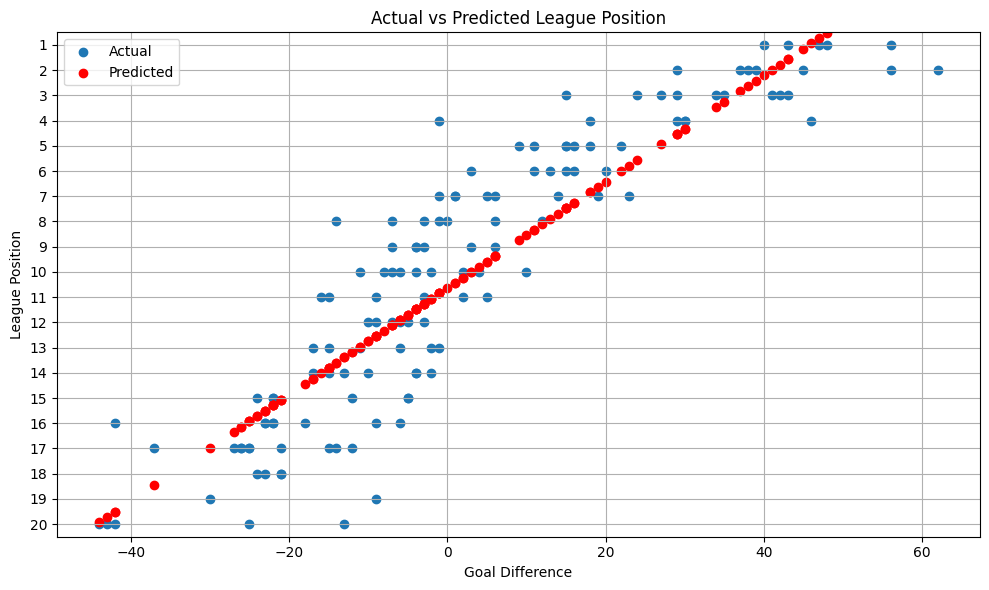

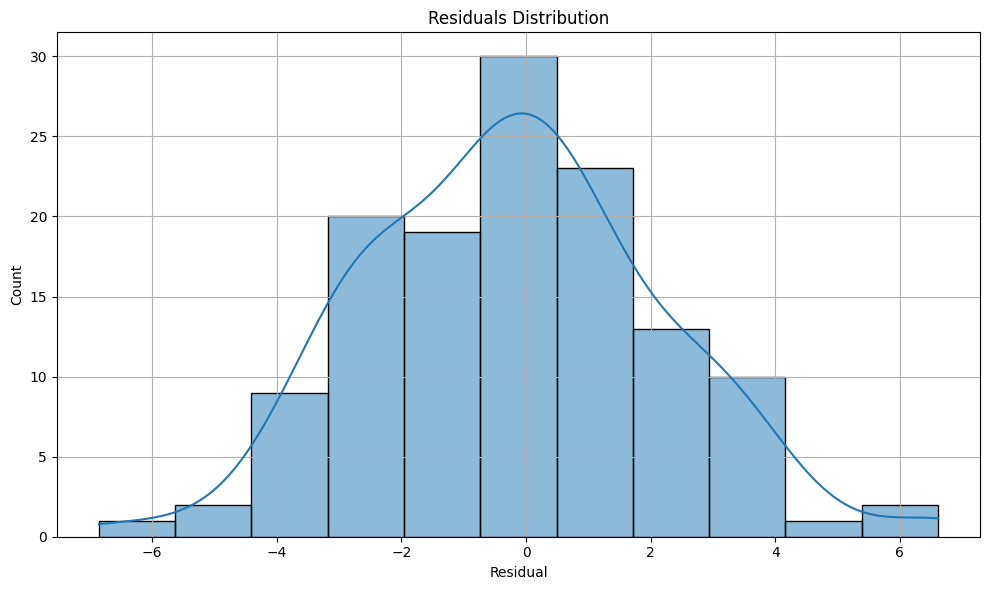

In [287]:
#Visualise the comparison between Actual adn Predicted league positions


# Scatter plot for Actual vs Predicted League Position
plt.figure(figsize=(10, 6))

plt.scatter(x_test, y_test, label='Actual')
plt.scatter(x_test, y_pred, color='red', label='Predicted')


plt.xlabel("Goal Difference")
plt.ylabel("League Position")
plt.title("Actual vs Predicted League Position")
plt.yticks(range(1,21))
plt.ylim(.5, 20.5)  
plt.gca().invert_yaxis()  # Make sure 1st place is at the top
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the distribution of residuals (prediction errors)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residual")
plt.grid(True)
plt.tight_layout()
plt.show()


### Conclusion

- Goal difference is a strong predictor of league position, with a significant inverse relationship observed.

- The **R² score** of the model is  0.85, meaning the model explains **85% of the variance** in the league position  absed on goal difference.
- **Future improvements**: 
    -Include more team stats,test other models like Ridge or RandomForest.